# 1. Training Several Different Linear Models (Full Dataset)

## Testing model training - exploration

### LinearRegression - Training model on Numerical Columns only --> Low Score 0.29

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
postcodes = pd.read_csv('data/zipcode-belgium.csv')
postcodes = postcodes.drop(columns=['lat', 'long'])
postcodes.head()

,postcode,locality
0,1000,Bruxelles
1,1020,Laeken
2,1030,Schaerbeek
3,1040,Etterbeek
4,1050,Ixelles


In [3]:
df = pd.read_csv('data/cleaned.csv').drop('Unnamed: 0', axis=1)
df.drop_duplicates()

numerical_cols = ['price','number_rooms', 'living_area', 'fireplace', 'furnished', 'terrace', 'garden', 'terrace_area', 'garden_area', 'surface_land', 'number_facades', 'swimming_pool', 'latitude', 'longitude']
cat_cols = ['property_type','property_subtype','kitchen','building_state','region','province','locality', 'postcode']

In [4]:
postalcode_merge_df = pd.merge(postcodes, df, on='locality', how='left')
postalcode_merge_df.drop_duplicates()

df = postalcode_merge_df.dropna()
df.head(500)

,postcode,locality,property_type,property_subtype,price,number_rooms,living_area,kitchen,furnished,fireplace,...,garden,garden_area,surface_land,number_facades,swimming_pool,building_state,region,province,latitude,longitude
0,1000,Bruxelles,HOUSE,HOUSE,698000.0,3.0,200.0,USA_HYPER_EQUIPPED,0.0,0.0,...,1.0,500.0,600.0,4.0,0.0,AS_NEW,Brussels,Brussels,50.846557,4.351697
1,1000,Bruxelles,HOUSE,VILLA,650000.0,4.0,270.0,SEMI_EQUIPPED,0.0,0.0,...,1.0,300.0,713.0,4.0,0.0,TO_RENOVATE,Brussels,Brussels,50.846557,4.351697
2,1000,Bruxelles,HOUSE,HOUSE,499000.0,4.0,155.0,HYPER_EQUIPPED,0.0,0.0,...,1.0,75.0,210.0,2.0,0.0,GOOD,Brussels,Brussels,50.846557,4.351697
3,1000,Bruxelles,APARTMENT,APARTMENT,385000.0,2.0,88.0,USA_INSTALLED,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,GOOD,Brussels,Brussels,50.846557,4.351697
4,1000,Bruxelles,APARTMENT,APARTMENT,365000.0,5.0,134.0,INSTALLED,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,GOOD,Brussels,Brussels,50.846557,4.351697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1080,Molenbeek-Saint-Jean,APARTMENT,APARTMENT,174000.0,1.0,65.0,NOT_DEFINED,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,GOOD,Brussels,Brussels,50.854596,4.338636
496,1080,Molenbeek-Saint-Jean,HOUSE,APARTMENT_BLOCK,599000.0,5.0,300.0,HYPER_EQUIPPED,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,AS_NEW,Brussels,Brussels,50.854596,4.338636
497,1080,Molenbeek-Saint-Jean,HOUSE,APARTMENT_BLOCK,699000.0,4.0,160.0,NOT_DEFINED,0.0,0.0,...,0.0,0.0,500.0,2.0,0.0,UNKNOWN,Brussels,Brussels,50.854596,4.338636
498,1080,Molenbeek-Saint-Jean,APARTMENT,APARTMENT,249000.0,2.0,100.0,INSTALLED,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,UNKNOWN,Brussels,Brussels,50.854596,4.338636


In [5]:
df.columns
df.isna().sum()

postcode            0
locality            0
property_type       0
property_subtype    0
price               0
number_rooms        0
living_area         0
kitchen             0
furnished           0
fireplace           0
terrace             0
terrace_area        0
garden              0
garden_area         0
surface_land        0
number_facades      0
swimming_pool       0
building_state      0
region              0
province            0
latitude            0
longitude           0
dtype: int64

In [6]:
X = df[numerical_cols].drop(columns=['price'], axis=1)
y = df['price']

2023-07-19 12:00:57.562508: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-19 12:00:57.564115: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-19 12:00:57.600309: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-19 12:00:57.600803: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-19 12:00:58.359372: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

General metrics for Linear models: 

Mean absolute error TEST = 104710.9057

Mean squared error TEST = 19800474035.9891

Median absolute error TEST = 81523.7363

Explain variance score TEST = 0.3249

R2 score *coefficient of Determination TEST = 0.3248

--------------------------------------
TRAINING SCORE: 0.3198685017112771
TESTING SCORE: 0.32475497377237195
--------------------------------------
Cross validation scores: 
 [0.33823876 0.27383638 0.32504117 0.35482298 0.31453265 0.25480414
 0.28682168 0.35608365 0.35244576 0.278701  ]
--------------------------------------
Saving the graph in output/model_graphs
--------------------------------------


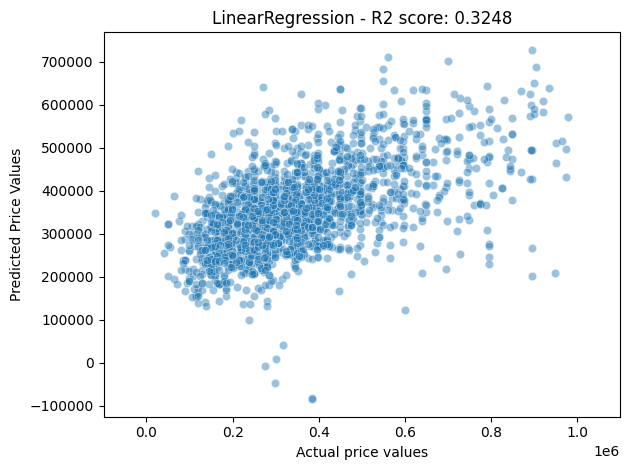

(array([309185.47639413, 296996.70891863, 286141.13079803, ...,
        458390.05800396, 538695.43126882, 341267.95293546]),
 622     325000.0
 2013    365000.0
 8103    345750.0
 1873    269000.0
 5105    174900.0
           ...   
 1470    525000.0
 3241    475000.0
 9962    275000.0
 7388    425000.0
 8257    745000.0
 Name: price, Length: 1889, dtype: float64)

In [7]:
from src.model_functions import train_linear_regr

train_linear_regr(X, y)

### Dropping less correlated numerical columns

In [8]:
df[numerical_cols].corr()['price'].sort_values(ascending=False)

price             1.000000
living_area       0.520740
number_rooms      0.409525
surface_land      0.237257
number_facades    0.175345
fireplace         0.136150
garden            0.134182
terrace_area      0.117371
terrace           0.113510
swimming_pool     0.096904
garden_area       0.092524
latitude          0.007480
furnished        -0.004397
longitude        -0.068915
Name: price, dtype: float64

In [9]:
numerical_cols = ['price','number_rooms', 'living_area', 'surface_land', 'number_facades', 'latitude', 'longitude']
cat_cols = ['property_type','property_subtype','kitchen','building_state','region','province',]

X = df[numerical_cols].drop(columns=['price'], axis=1)
y = df['price']

General metrics for Linear models: 

Mean absolute error TEST = 107053.6427

Mean squared error TEST = 20428408197.1658

Median absolute error TEST = 84334.0351

Explain variance score TEST = 0.3036

R2 score *coefficient of Determination TEST = 0.3033

--------------------------------------
TRAINING SCORE: 0.29835250972920613
TESTING SCORE: 0.303340869324048
--------------------------------------
Cross validation scores: 
 [0.32615769 0.24909804 0.30729298 0.3487742  0.31655096 0.2269504
 0.2564933  0.31368014 0.31951021 0.27568892]
--------------------------------------
Saving the graph in output/model_graphs
--------------------------------------


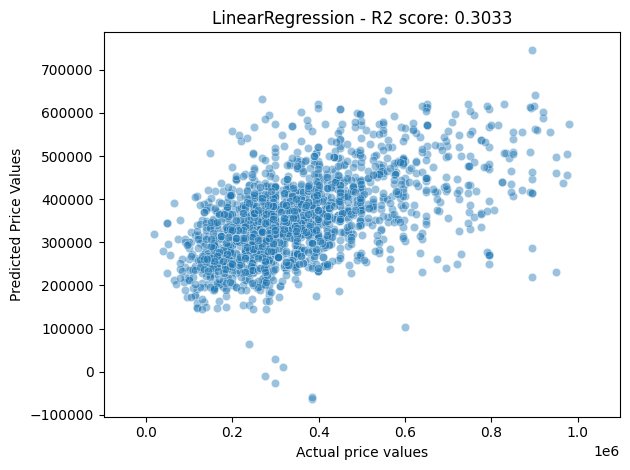

(array([331516.96454738, 325205.24162774, 280253.8486809 , ...,
        461396.13031726, 499466.73584544, 344304.6582419 ]),
 622     325000.0
 2013    365000.0
 8103    345750.0
 1873    269000.0
 5105    174900.0
           ...   
 1470    525000.0
 3241    475000.0
 9962    275000.0
 7388    425000.0
 8257    745000.0
 Name: price, Length: 1889, dtype: float64)

In [10]:
from src.model_functions import train_linear_regr

train_linear_regr(X, y)

# 2. Selecting columns + insert Dummies


In [11]:
# Add the first 2 numbers of the postcode to the dataframe - see if any improvement in model
# NOTE: very slight increase in model performance - but training time is more than doubled - opted not to use this feature
df['postcode_abbr'] = df['postcode'].apply(lambda x: int(x/100))

/tmp/ipykernel_26726/1193995140.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['postcode_abbr'] = df['postcode'].apply(lambda x: int(x/100))


In [12]:
# including Locality to see if any difference ==> LOCALITY HAS NEGATIVE INFLUENCE7
# Included poistcode - negative influence on the models overall
cat_cols = ['property_type','property_subtype','kitchen','building_state','region','province']
numerical_cols = ['price','number_rooms', 'living_area', 'surface_land', 'number_facades','latitude','longitude']

dummies = pd.get_dummies(df[cat_cols], columns=cat_cols)

new_df = pd.concat([df[numerical_cols], dummies], axis=1)
new_df.reset_index().drop(columns=['index'], inplace=True)

## Linear Regression --> score: 0.58

General metrics for Linear models: 

Mean absolute error TEST = 81351.5961

Mean squared error TEST = 12297112277.8925

Median absolute error TEST = 62936.0

Explain variance score TEST = 0.5807

R2 score *coefficient of Determination TEST = 0.5806

--------------------------------------
TRAINING SCORE: 0.5798523419274266
TESTING SCORE: 0.5806381257581426
--------------------------------------


Cross validation scores: 
 [ 5.42733466e-01  5.46934876e-01  5.89128376e-01  5.53159927e-01
  5.90421359e-01  5.63165105e-01 -2.16531184e+20  5.72792017e-01
  6.10080083e-01  5.62182127e-01]
--------------------------------------
Saving the graph in output/model_graphs
--------------------------------------


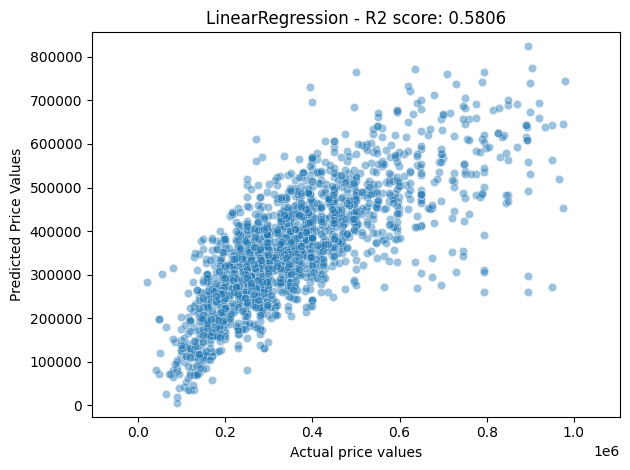

In [13]:
from src.model_functions import train_linear_regr

X = new_df.drop(columns=['price'], axis=1)
y = new_df['price']

#Training the Linear Model (LinearRegression) - and normalize the data with MinMaxScaler
y_preds, y_test = train_linear_regr(X, y)


## Model K-Nearest Neighbour --> score: 0.58

In [14]:
from src.model_functions import train_knn_regr

X = new_df.drop(columns=['price'], axis=1)
y = new_df['price']

Scores for the initial training (Without GridSearch)
General metrics for Linear models: 

Mean absolute error TEST = 79303.6747

Mean squared error TEST = 12167573648.1736

Median absolute error TEST = 58857.1429

Explain variance score TEST = 0.5866

R2 score *coefficient of Determination TEST = 0.5851

--------------------------------------


TRAINING SCORE: 0.6218273497899057
TESTING SCORE: 0.5850557126938418
--------------------------------------
Cross validation scores: 
 [0.50612866 0.58550863 0.57924228 0.55772179 0.59536377 0.48035004
 0.53537642 0.53644047 0.60496421 0.53936161]
--------------------------------------
Saving the graph in output/model_graphs
--------------------------------------


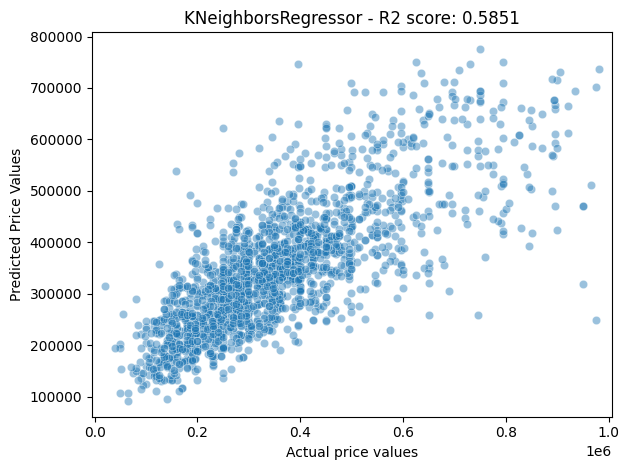

In [15]:
# Train the model (KNeighborsRegressor) with n_neighbors as 14 (see gridsearch below- best ne niegnbours)
params = {'n_neighbors':14}
print("Scores for the initial training (Without GridSearch)")
model, X_train, X_test, y_train, y_test = train_knn_regr(X, y, **params)

# implementing GridSearch
# Check for the best n_neighbor and other hyperparameters

# from sklearn.model_selection import GridSearchCV

# params = {"n_neighbors": np.arange(10,15), 
#           "metric": ["euclidean", "cityblock"],
#           "weights":['uniform', 'distance'],
#           "algorithm":['auto', 'ball_tree', 'kd_tree', 'brute']}

# print('Calculating best parameters through GridSearchCV. . .')
# grid = GridSearchCV(estimator=model,param_grid=params)
# grid.fit(X_train, y_train)
# print(f'Best score: {grid.best_score_}')

# # Retrain the model with the optimal parameters

# best_params = grid.best_estimator_.get_params()
# print(f"The Best parameters found from GridSearchCV: {best_params}")

# model, X_train, X_test, y_train, y_test = train_knn_regr(X, y, **best_params)


## Polynomial regresssion (NOT useful if degree > 1) --> score: 0.58

General metrics for Linear models: 

Mean absolute error TEST = 81388.4431

Mean squared error TEST = 12293731981.4246

Median absolute error TEST = 63160.0

Explain variance score TEST = 0.5808

R2 score *coefficient of Determination TEST = 0.5808

--------------------------------------
TRAINING SCORE: 0.5797632268322961
TESTING SCORE: 0.5807534022092531
--------------------------------------
Cross validation scores: 
 [ 5.42627591e-01  5.47128380e-01  5.89618518e-01  5.53146325e-01
  5.89812935e-01  5.63183285e-01 -6.97725376e+19  5.72385604e-01
  6.10106353e-01  5.61662743e-01]
--------------------------------------
Saving the graph in output/model_graphs
--------------------------------------


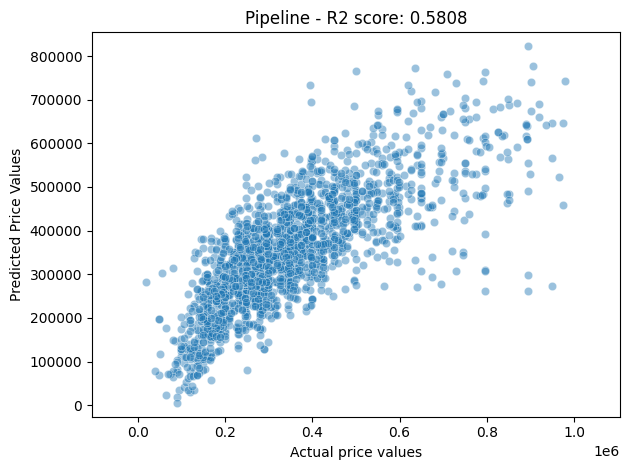

In [16]:
from src.model_functions import train_polynomial_regr

X = new_df.drop(columns=['price'], axis=1)
y = df['price']

degree = 1
train_polynomial_regr(X, y, degree)

## Huberregressor --> score: 0.57

General metrics for Linear models: 

Mean absolute error TEST = 79367.9613

Mean squared error TEST = 12555310794.4747

Median absolute error TEST = 59735.0762

Explain variance score TEST = 0.5765

R2 score *coefficient of Determination TEST = 0.5718

--------------------------------------
TRAINING SCORE: 0.5656109149823432
TESTING SCORE: 0.5718329191865958
--------------------------------------
Cross validation scores: 
 [0.53202622 0.53345899 0.5764177  0.54958728 0.56803282 0.54200913
 0.5562657  0.57200397 0.61051626 0.55383638]
--------------------------------------
Saving the graph in output/model_graphs
--------------------------------------


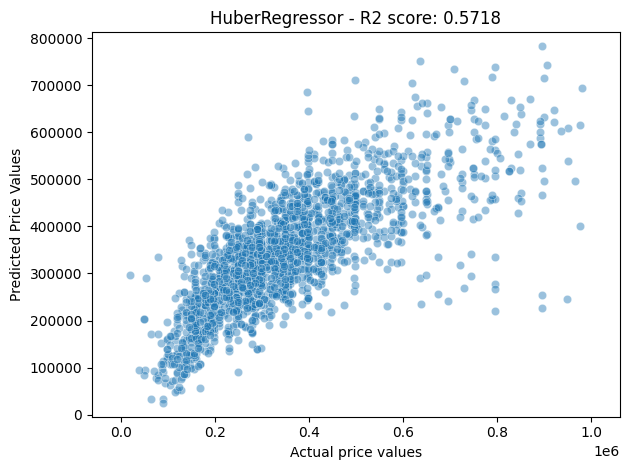

In [17]:
from src.model_functions import train_huberregressor

train_huberregressor(X,y)

## Decision Tree Regressor --> score: 0.56

General metrics for Linear models: 

Mean absolute error TEST = 73528.6566

Mean squared error TEST = 12770605403.9726

Median absolute error TEST = 47500.0

Explain variance score TEST = 0.5651

R2 score *coefficient of Determination TEST = 0.5645

--------------------------------------
TRAINING SCORE: 0.9993332932162652
TESTING SCORE: 0.5644908417205261
--------------------------------------
Cross validation scores: 
 [0.45802862 0.50173116 0.51905155 0.5736132  0.51044716 0.51649711
 0.5297721  0.51681154 0.4716847  0.48262113]
--------------------------------------
Saving the graph in output/model_graphs
--------------------------------------


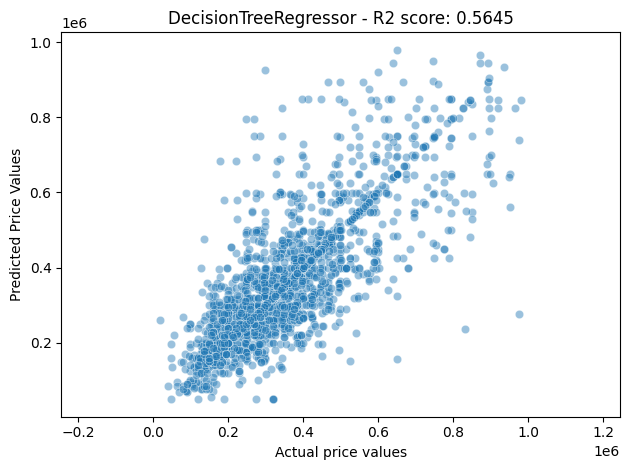

In [18]:
from src.model_functions import train_decessiontree_regression

X = new_df.drop(columns=['price'], axis=1)
y = df['price']

train_decessiontree_regression(X, y)

## Xgboost Regression --> score: 0.80

General metrics for Linear models: 

Mean absolute error TEST = 54885.9907

Mean squared error TEST = 5845267189.5407

Median absolute error TEST = 39387.2656

Explain variance score TEST = 0.8035

R2 score *coefficient of Determination TEST = 0.8034

--------------------------------------
TRAINING SCORE: 0.9310402886305642
TESTING SCORE: 0.8034376727713815
--------------------------------------
Cross validation scores: 
 [0.74928108 0.75056096 0.76551827 0.75152203 0.80326452 0.75630356
 0.74491564 0.78125817 0.73967731 0.72692145]
--------------------------------------
Saving the graph in output/model_graphs
--------------------------------------


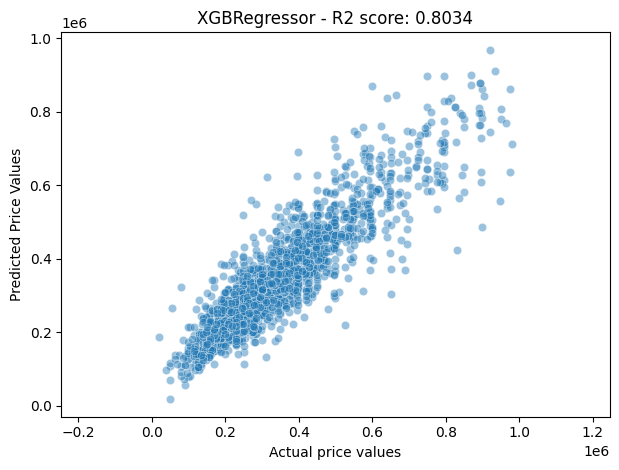

In [19]:
from src.model_functions import train_XGBoost_regression

y_test, y_preds = train_XGBoost_regression(X, y)

## Neural Network (Keras) --> 0.64

In [20]:
# USE tensorboard --logdir=./log/ to see the tensorboard interactive page
from src.model_functions import train_neural_network

X = new_df.drop(columns=['price'], axis=1)
y = df['price']

epochs = 100
batch_size = 8
# train_neural_network(X,y, epochs, batch_size)

## Stochastic Gradient Descent - SGDRegressor --> score: 0.58

General metrics for Linear models: 

Mean absolute error TEST = 81356.654

Mean squared error TEST = 12200840990.1634

Median absolute error TEST = 62830.8534

Explain variance score TEST = 0.5899

R2 score *coefficient of Determination TEST = 0.5897

--------------------------------------
TRAINING SCORE: 0.5764859016782498
TESTING SCORE: 0.5897149571769555
--------------------------------------
Cross validation scores: 
 [0.53953592 0.54669137 0.56185976 0.55717718 0.58872016 0.58391761
 0.59017131 0.55946821 0.60909735 0.57015724]
--------------------------------------
Saving the graph in output/model_graphs
--------------------------------------


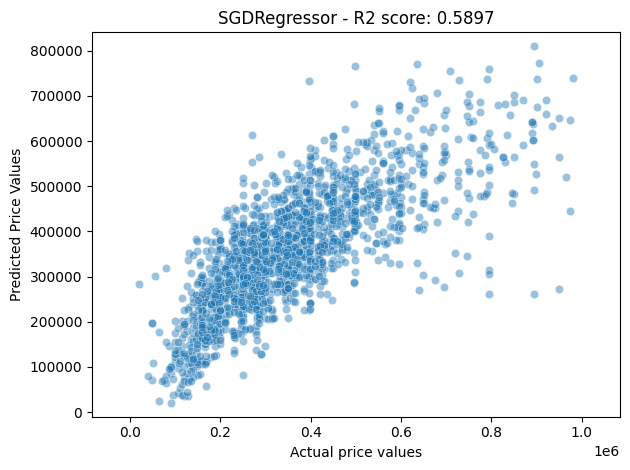

In [21]:
from src.model_functions import train_SGDregressor

X = new_df.drop(columns=['price'], axis=1)
y = df['price']

train_SGDregressor(X, y)

# 3. Training on split Type Houses and Apartments

In [22]:
df_house = new_df[new_df['property_type_HOUSE'] == 1]
df_app = new_df[new_df['property_type_APARTMENT'] == 1]

X_house = df_house.drop(columns=['price'], axis=1)
y_house = df_house['price']

X_app = df_app.drop(columns=['price'], axis=1)
y_app = df_app['price']

## Linear Regression

### House --> 0.63

General metrics for Linear models: 

Mean absolute error TEST = 78656.5337

Mean squared error TEST = 11344728018.8809

Median absolute error TEST = 59584.0

Explain variance score TEST = 0.632

R2 score *coefficient of Determination TEST = 0.6309

--------------------------------------
TRAINING SCORE: 0.6716441120417997
TESTING SCORE: 0.6309056548707214
--------------------------------------
Cross validation scores: 
 [0.65742856 0.67212323 0.65248232 0.659429   0.64124224 0.67348972
 0.65805296 0.66971892 0.67797175 0.68864123]
--------------------------------------
Saving the graph in output/model_graphs
--------------------------------------


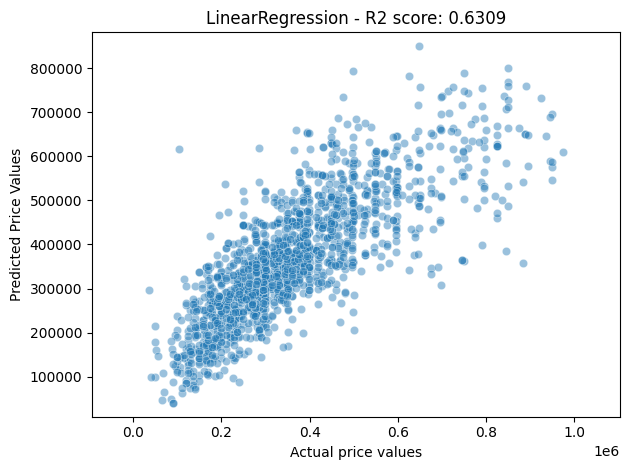

(array([250464., 228560., 215744., ..., 850976., 282896., 288720.]),
 1342    210000.0
 7094    229000.0
 4817    229000.0
 1404    365000.0
 9374    450000.0
           ...   
 5939    149000.0
 5610    295000.0
 476     649000.0
 6347    195000.0
 8483    175000.0
 Name: price, Length: 1469, dtype: float64)

In [23]:
from src.model_functions import train_linear_regr
import matplotlib.pyplot as plt

train_linear_regr(X_house,y_house)

### Apartments --> 0.42

General metrics for Linear models: 

Mean absolute error TEST = 82594.3468

Mean squared error TEST = 13707318764.9881

Median absolute error TEST = 60392.0

Explain variance score TEST = 0.4293

R2 score *coefficient of Determination TEST = 0.4279

--------------------------------------
TRAINING SCORE: 0.47898402514169414
TESTING SCORE: 0.427858991005727
--------------------------------------
Cross validation scores: 
 [-6.79368252e+19  4.85540404e-01  4.29287833e-01  4.05580740e-01
  4.05419514e-01  4.16702634e-01  4.52918926e-01  5.41011552e-01
  5.02146144e-01  4.69250912e-01]
--------------------------------------
Saving the graph in output/model_graphs
--------------------------------------


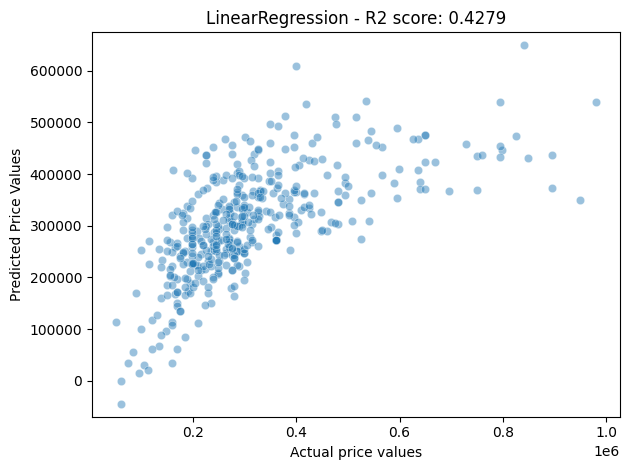

(array([ 3.88096e+05,  4.32000e+05,  2.32448e+05,  1.50784e+05,
         2.99520e+04,  3.34848e+05,  2.77504e+05,  1.69216e+05,
         4.27008e+05,  2.91584e+05,  2.76224e+05,  1.84576e+05,
         2.24512e+05,  3.64032e+05,  2.11968e+05,  3.16416e+05,
         3.92192e+05,  2.74176e+05,  2.02240e+05,  3.08736e+05,
         3.24992e+05,  2.28096e+05,  2.50880e+05,  4.17280e+05,
         1.12896e+05,  4.17024e+05,  9.71520e+04,  2.90304e+05,
         4.60800e+05,  1.44128e+05,  3.03232e+05,  2.91328e+05,
         3.86944e+05,  1.97120e+05,  2.89792e+05,  4.35456e+05,
         2.50880e+05,  3.14880e+05,  3.13088e+05,  2.25280e+05,
         3.29088e+05,  3.64032e+05,  3.07712e+05,  3.08480e+05,
         2.46784e+05,  3.16032e+05,  3.07712e+05,  3.72224e+05,
         2.14784e+05,  4.39296e+05,  3.40480e+05,  3.61472e+05,
         3.92832e+05,  2.01216e+05,  1.60768e+05,  2.76992e+05,
         2.54976e+05,  2.97984e+05,  3.08224e+05,  4.67456e+05,
         3.24608e+05,  3.59424e+05,  5.4

In [24]:

# NOT ENOUGH DATAPOINTS - IF SKEWED RESULT --> REMOVE POSTCODE ABBR feature
train_linear_regr(X_app,y_app)

## XGBoost

### House --> score: 0.76

General metrics for Linear models: 

Mean absolute error TEST = 59820.5286

Mean squared error TEST = 7440554949.7951

Median absolute error TEST = 40971.3281

Explain variance score TEST = 0.7609

R2 score *coefficient of Determination TEST = 0.7608

--------------------------------------
TRAINING SCORE: 0.9456457539296447
TESTING SCORE: 0.7608427061758977
--------------------------------------
Cross validation scores: 
 [0.7626534  0.78068538 0.74327949 0.77171942 0.79666323 0.77542566
 0.77471706 0.76724273 0.75806482 0.79102736]
--------------------------------------
Saving the graph in output/model_graphs
--------------------------------------


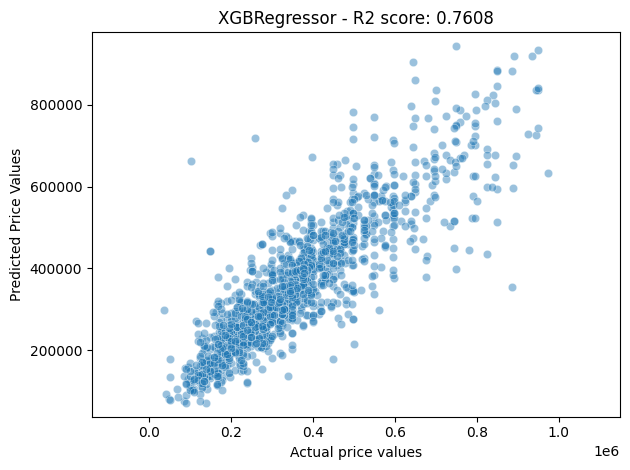

(1342     210000.0
 7094     229000.0
 4817     229000.0
 1404     365000.0
 9374     450000.0
            ...   
 483      720000.0
 10425    180000.0
 3442     345000.0
 3631     610000.0
 6588     349000.0
 Name: price, Length: 1336, dtype: float64,
 array([213249.42, 167600.53, 212358.03, ..., 344897.7 , 555479.06,
        212045.44], dtype=float32))

In [25]:
# HOUSE PREDICTIONS
from src.model_functions import train_XGBoost_regression

train_XGBoost_regression(X_house, y_house)

### Apartments --> score: 0.71

General metrics for Linear models: 

Mean absolute error TEST = 50910.9978

Mean squared error TEST = 6467832544.3885

Median absolute error TEST = 30830.8203

Explain variance score TEST = 0.7109

R2 score *coefficient of Determination TEST = 0.7109

--------------------------------------
TRAINING SCORE: 0.985156908241426
TESTING SCORE: 0.7108958894027468
--------------------------------------
Cross validation scores: 
 [0.75530291 0.5759087  0.68789167 0.65860443 0.80743173 0.7009887
 0.75347213 0.749243   0.76952    0.74819887]
--------------------------------------
Saving the graph in output/model_graphs
--------------------------------------


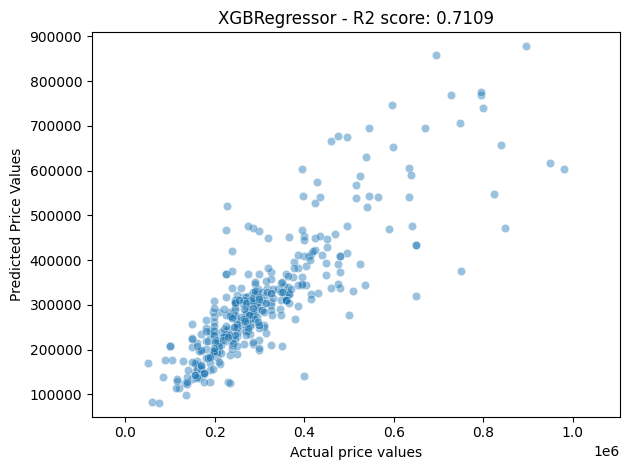

(123      259000.0
 10186    849000.0
 926      230000.0
 3599     169000.0
 7428     105000.0
            ...   
 254      650000.0
 4343     326000.0
 2870     228544.0
 10012    220000.0
 3664     299000.0
 Name: price, Length: 382, dtype: float64,
 array([336931.25 , 472522.3  , 230527.9  , 197487.67 , 175967.53 ,
        335505.25 , 255825.69 , 127863.375, 450306.8  , 277100.25 ,
        235042.36 , 204989.69 , 183096.3  , 695942.6  , 240615.56 ,
        361611.62 , 372988.84 , 587062.3  , 197142.42 , 291513.38 ,
        265382.22 , 197983.1  , 300381.44 , 374291.2  , 169262.61 ,
        387605.34 , 134270.62 , 392743.78 , 325650.03 , 144624.9  ,
        236733.4  , 251577.12 , 328326.   , 157440.25 , 209296.53 ,
        374605.75 , 188235.78 , 181800.47 , 382610.   , 135416.36 ,
        335205.   , 343086.12 , 457311.56 , 286179.97 , 243459.3  ,
        316845.75 , 301397.03 , 339691.7  , 192634.5  , 450499.6  ,
        466058.25 , 414651.1  , 196861.67 , 162933.23 , 137825.47 ,


In [26]:
# HOUSE PREDICTIONS
from src.model_functions import train_XGBoost_regression

train_XGBoost_regression(X_app, y_app)

## Neural network (Keras)

### House --> score: 0.60

In [27]:
from src.model_functions import train_neural_network

# USE tensorboard --logdir=./log/ to see the tensorboard interactive page
# Increasing epochs --> model scores up to 0.64

epochs = 100
batch_size = 8
# train_neural_network(X_house,y_house, epochs, batch_size)

### Apartments --> score: 0.42

In [28]:
# USE tensorboard --logdir=./log/ to see the tensorboard interactive page
epochs = 100
batch_size = 8
# train_neural_network(X_app, y_app, epochs, batch_size)